<a href="https://colab.research.google.com/github/SasmithaUdaya/Deep-Learning-model/blob/main/House_price_prediction_advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction Regression Project

## Project Goal

Predict the price of a house by its features. If you are a buyer or seller of the house but you don't know the extract price of the house, so supervised machine learning regression algorithms can help you to predict the price of the house just providng features of the targert house

**Load modules / Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype

**Load the Dataset**

In [2]:
train_data_path = r'/content/train.csv'
test_data_path = r'/content/test.csv'

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [3]:
print("Shape of df_train : " , df_train.shape)
print("Shape of df_test : " , df_test.shape)

Shape of df_train :  (1460, 81)
Shape of df_test :  (1459, 80)


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
## concat train and test
df = pd.concat([df_train, df_test])

print("Shape of df: ", df.shape)

Shape of df:  (2919, 81)


In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [12]:
len(df.select_dtypes(include=['int64', 'float64']).columns)

38

In [13]:
categorical_feat = df.select_dtypes(include=['object']).columns
print(categorical_feat)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [14]:
len(df.select_dtypes(include=['object']).columns)

43

<Axes: >

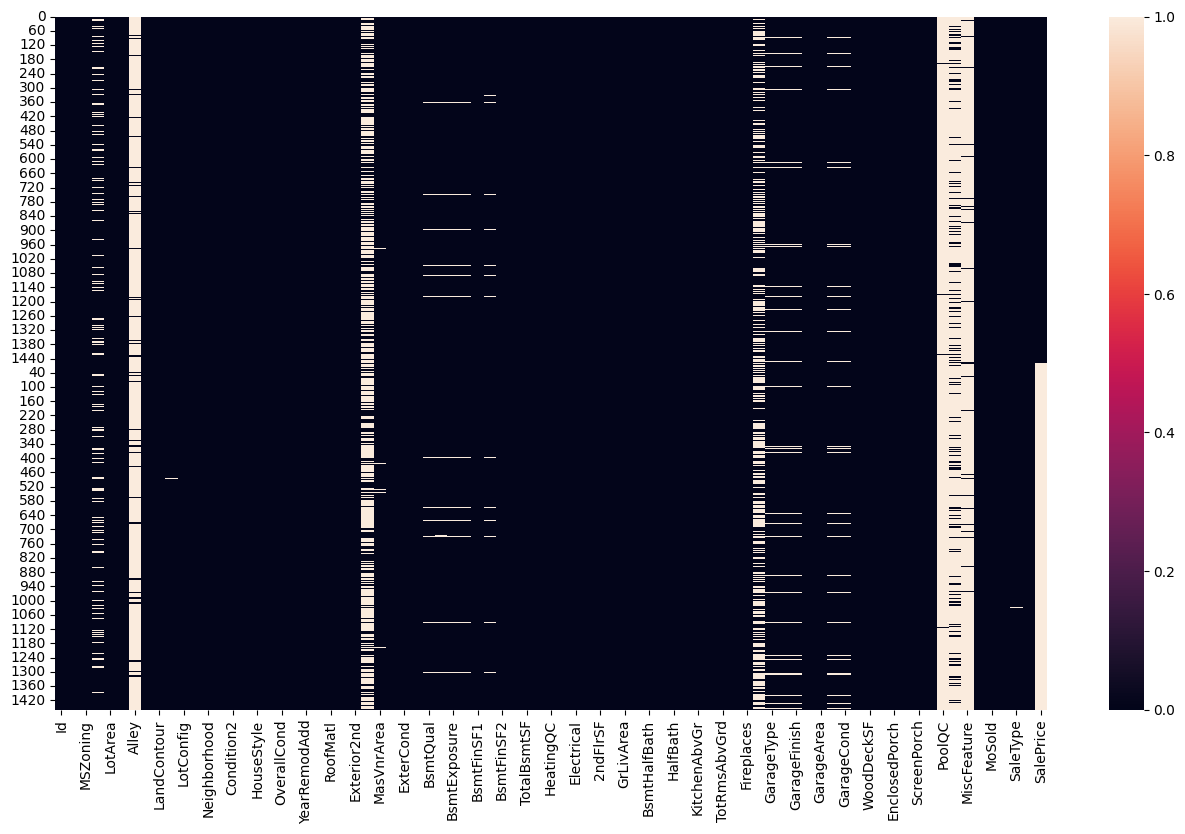

In [15]:
# Show the null values using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [16]:
# Get the percentages of null value
null_percent = df.isnull().sum()
null_percent = (null_percent/len(df))*100
null_percent

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517


In [17]:
miss_value_50_perc  = null_percent[null_percent > 50]
miss_value_50_perc

,0
Alley,93.216855
MasVnrType,60.500171
PoolQC,99.657417
Fence,80.438506
MiscFeature,96.402878


In [18]:
df["Alley"].value_counts()

,count
Alley,
Grvl,120
Pave,78


In [19]:
df["Alley"].dtype


dtype('O')

In [20]:
df["MasVnrType"].dtype

dtype('O')

In [21]:
df["PoolQC"].dtype

dtype('O')

In [22]:
df["Fence"].dtype

dtype('O')

In [23]:
df["MiscFeature"].dtype

dtype('O')

In [24]:
df["SalePrice"].dtype

dtype('float64')

In [25]:
miss_value_20_50_perc  = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

,0
FireplaceQu,48.646797
SalePrice,49.982871


In [26]:
# Select numerical features
numerical_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_data.corr()
print(correlation_matrix)


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.008931    -0.027549 -0.040746    -0.029771   
MSSubClass     0.008931    1.000000    -0.417359 -0.201730     0.033638   
LotFrontage   -0.027549   -0.417359     1.000000  0.489896     0.217645   
LotArea       -0.040746   -0.201730     0.489896  1.000000     0.100541   
OverallQual   -0.029771    0.033638     0.217645  0.100541     1.000000   
OverallCond   -0.002839   -0.065625    -0.075508 -0.035617    -0.093847   
YearBuilt     -0.016581    0.034409     0.122811  0.024128     0.597554   
YearRemodAdd  -0.050438    0.043315     0.091557  0.021612     0.571532   
MasVnrArea    -0.025219    0.005433     0.221079  0.125596     0.432947   
BsmtFinSF1    -0.016947   -0.064311     0.219408  0.194031     0.281810   
BsmtFinSF2     0.018251   -0.072530     0.047431  0.084059    -0.042771   
BsmtUnfSF     -0.014453   -0.125994     0.113714  0.021362     0.275175   
TotalBsmtSF   -0.024924  

In [27]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

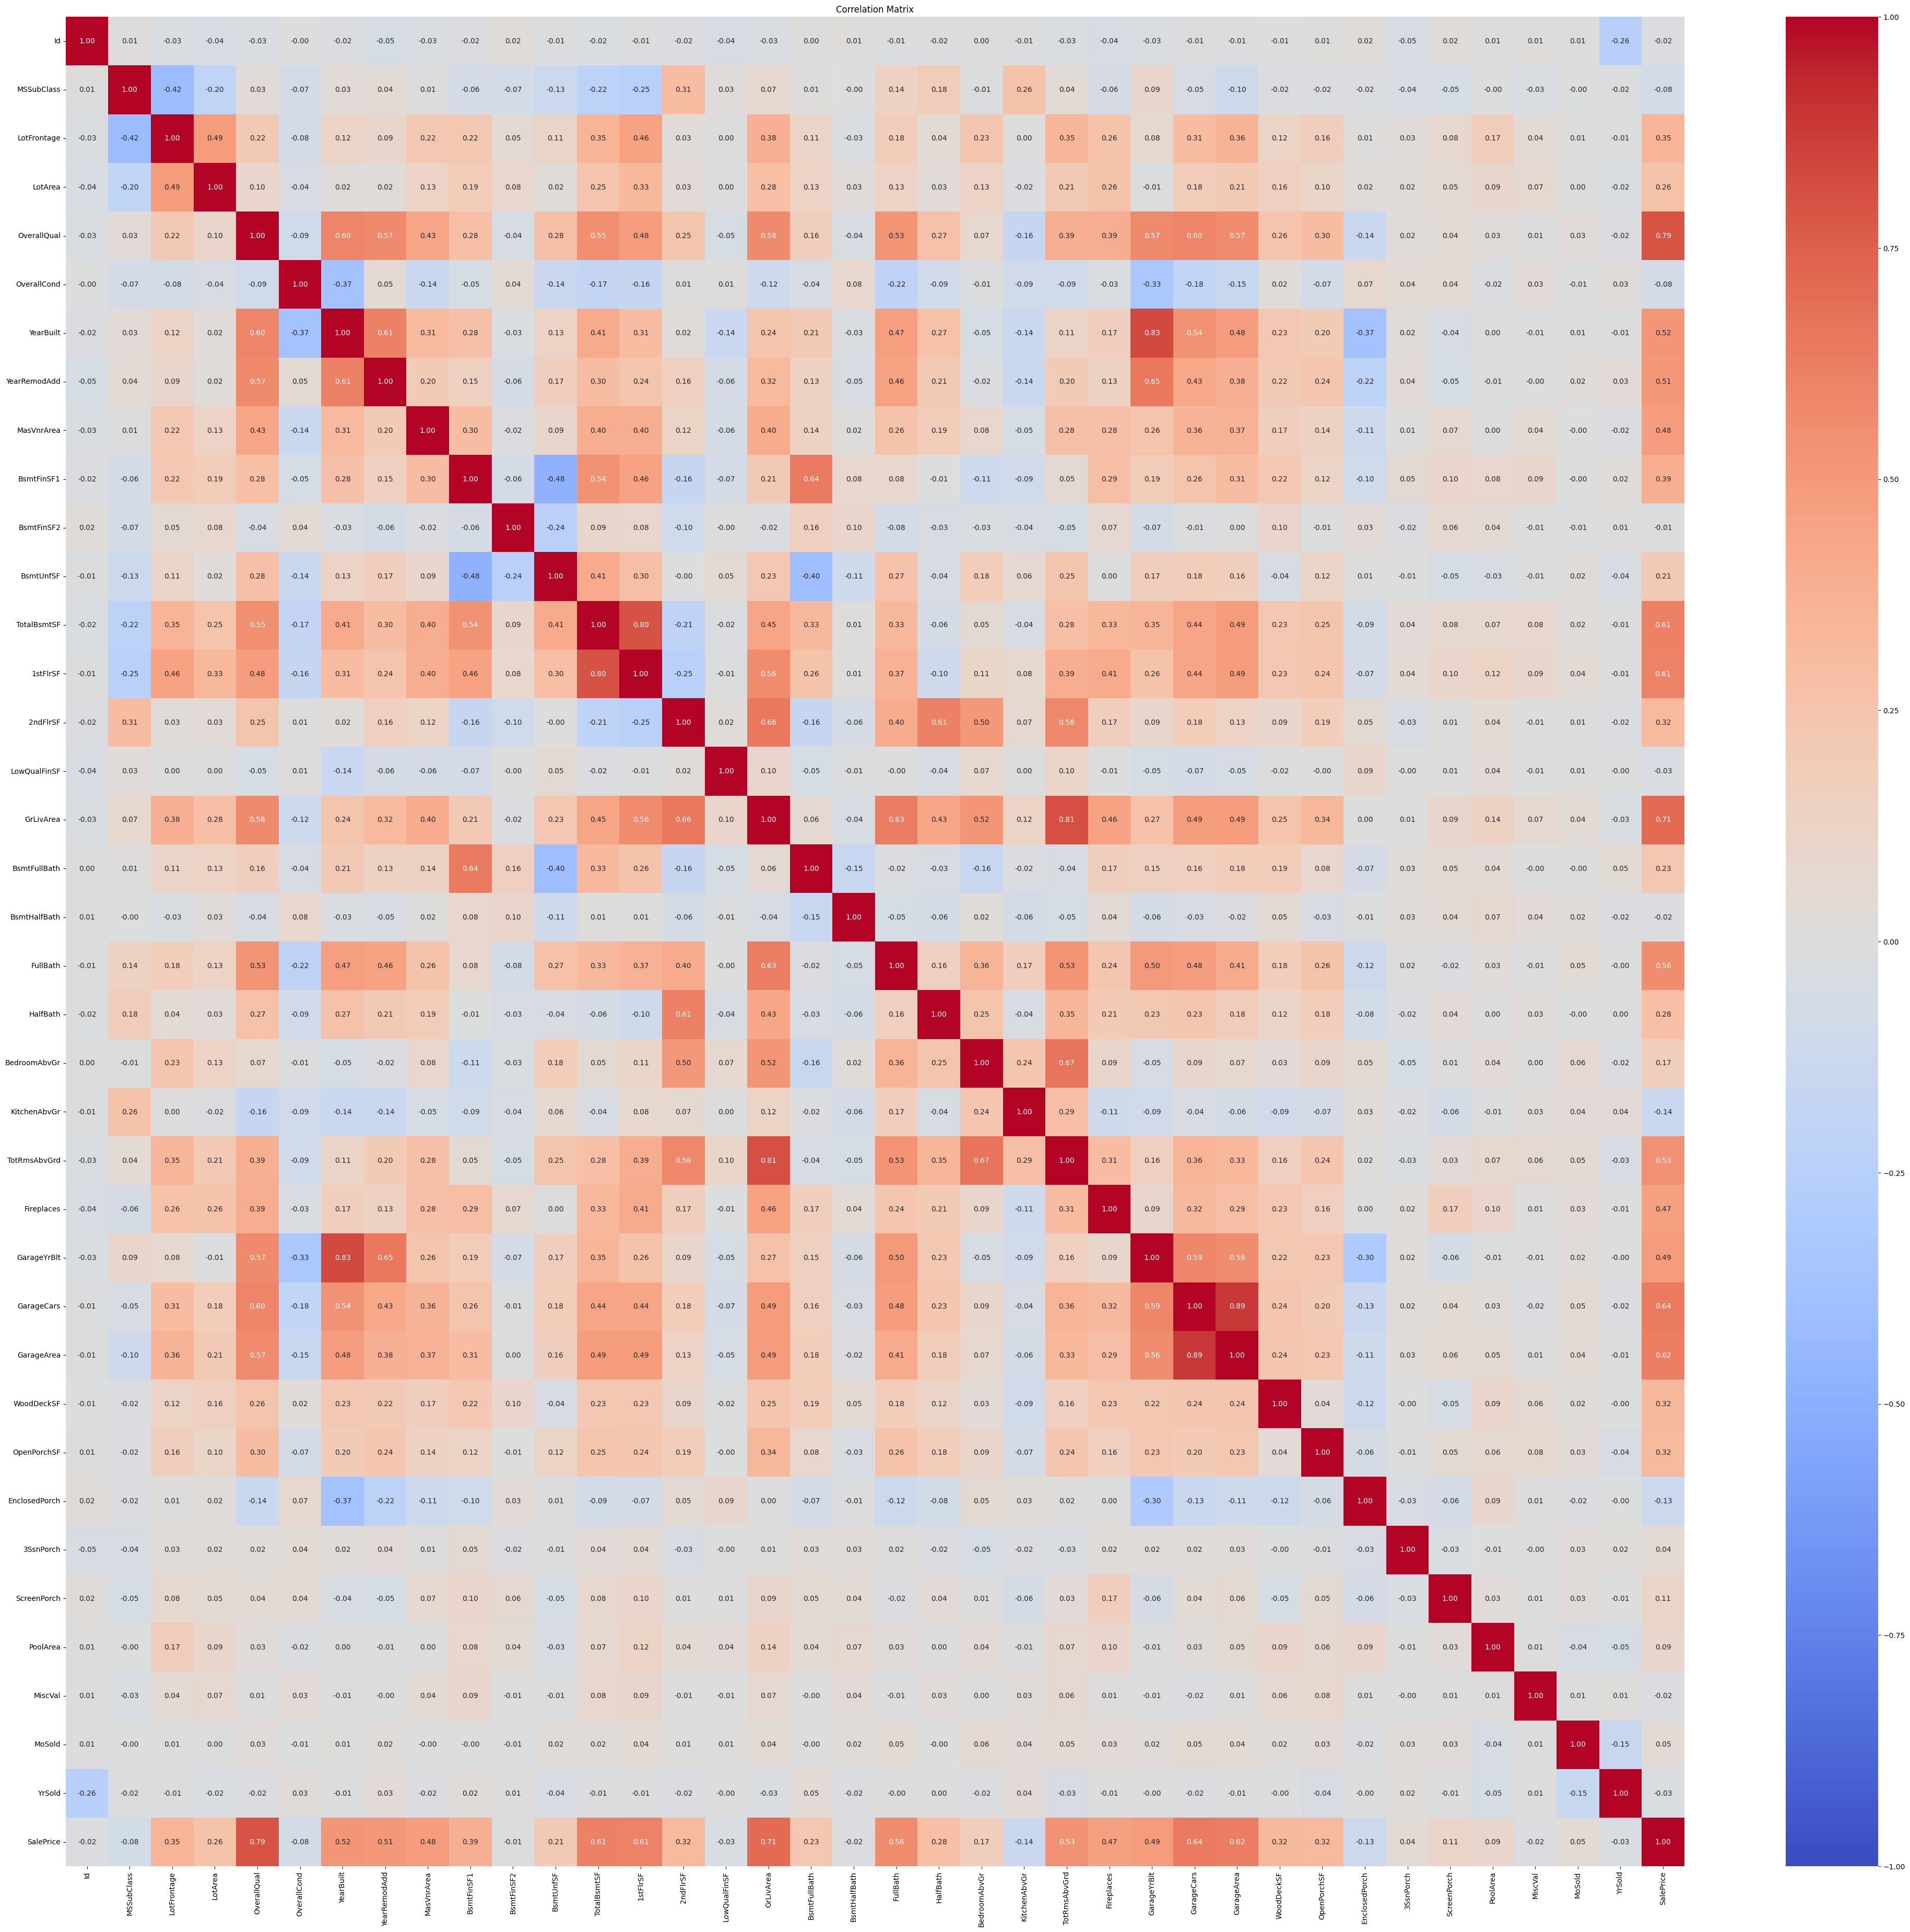

In [28]:
plt.figure(figsize=(50, 46))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


# Function to compute Cramér's V
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)

    # Compute Chi-squared statistic
    chi2, _, _, _ = chi2_contingency(contingency_table)

    # Calculate Cramér's V
    n = contingency_table.sum().sum()  # Total observations
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Example usage
# Select another categorical column, for example 'SaleCondition'
cramers_v_value = cramers_v(df['Alley'], df['SaleCondition'])
print(f"Cramér's V: {cramers_v_value:.2f}")


Cramér's V: 0.33


### We will not drop any features without any observation and without any domain knowledge

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to compute Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total observations
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Calculate Cramér's V for all categorical features against the target variable
categorical_columns = df.select_dtypes(include=['object']).columns  # Select categorical variables
target_variable = 'SaleCondition'  # Replace with your target variable name

cramers_v_results = {}
for col in categorical_columns:
    if col != target_variable:  # Skip target variable itself
        cramers_v_value = cramers_v(df[col], df[target_variable])
        cramers_v_results[col] = cramers_v_value

# Display results
sorted_results = sorted(cramers_v_results.items(), key=lambda x: x[1], reverse=True)
for feature, value in sorted_results:
    print(f"{feature}: Cramér's V = {value:.2f}")

# Drop unimportant variables
threshold = 0.1  # Set your importance threshold
important_features = [feature for feature, value in cramers_v_results.items() if value > threshold]
dropped_features = [feature for feature in cramers_v_results if feature not in important_features]

print("\nImportant Features:", important_features)
print("Dropped Features:", dropped_features)


PoolQC: Cramér's V = 0.58
SaleType: Cramér's V = 0.47
Alley: Cramér's V = 0.33
MiscFeature: Cramér's V = 0.29
MasVnrType: Cramér's V = 0.26
ExterQual: Cramér's V = 0.24
Neighborhood: Cramér's V = 0.23
BsmtQual: Cramér's V = 0.23
KitchenQual: Cramér's V = 0.22
GarageFinish: Cramér's V = 0.20
CentralAir: Cramér's V = 0.20
Exterior1st: Cramér's V = 0.20
Exterior2nd: Cramér's V = 0.19
Street: Cramér's V = 0.17
Foundation: Cramér's V = 0.17
HeatingQC: Cramér's V = 0.16
FireplaceQu: Cramér's V = 0.16
BldgType: Cramér's V = 0.15
MSZoning: Cramér's V = 0.13
GarageType: Cramér's V = 0.12
BsmtFinType1: Cramér's V = 0.12
PavedDrive: Cramér's V = 0.11
Electrical: Cramér's V = 0.11
BsmtExposure: Cramér's V = 0.10
LandContour: Cramér's V = 0.10
HouseStyle: Cramér's V = 0.10
BsmtCond: Cramér's V = 0.08
RoofStyle: Cramér's V = 0.08
ExterCond: Cramér's V = 0.08
Fence: Cramér's V = 0.07
RoofMatl: Cramér's V = 0.07
Condition1: Cramér's V = 0.07
Functional: Cramér's V = 0.07
LotShape: Cramér's V = 0.07
Ut

## **Missing values imputation**

In [31]:
missing_value_feat = null_percent[null_percent > 0]
missing_value_feat
print("Total missing value features = ", len(missing_value_feat))

Total missing value features =  35


In [32]:
missing_value_feat

,0
MSZoning,0.137033
LotFrontage,16.649538
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
MasVnrArea,0.787941
BsmtQual,2.774923
BsmtCond,2.809181


In [33]:
numeric_features = missing_value_feat[missing_value_feat.keys().isin(numerical_features)]
print("Total number of categorical missing features = ",len(numeric_features))
numeric_features

Total number of categorical missing features =  12


,0
LotFrontage,16.649538
MasVnrArea,0.787941
BsmtFinSF1,0.034258
BsmtFinSF2,0.034258
BsmtUnfSF,0.034258
TotalBsmtSF,0.034258
BsmtFullBath,0.068517
BsmtHalfBath,0.068517
GarageYrBlt,5.447071
GarageCars,0.034258


In [34]:
cat_features = missing_value_feat[missing_value_feat.keys().isin(categorical_feat)]
print("Total number of categorical missing features = ",len(cat_features))

Total number of categorical missing features =  23


In [35]:
cat_features

,0
MSZoning,0.137033
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
BsmtQual,2.774923
BsmtCond,2.809181
BsmtExposure,2.809181
BsmtFinType1,2.706406


In [36]:
df["MSZoning"].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25


<Axes: xlabel='count', ylabel='MSZoning'>

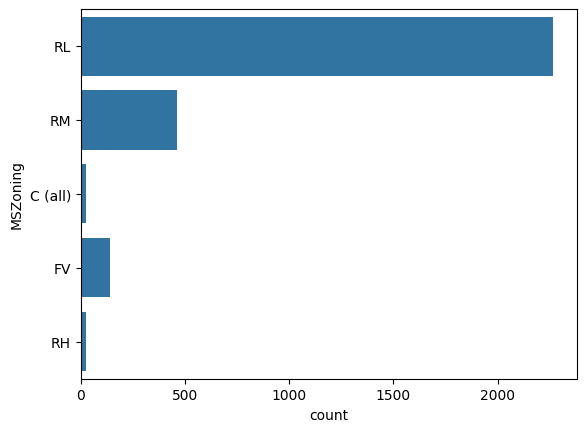

In [37]:
sns.countplot(df["MSZoning"])

## Backup of original data

In [38]:
df = df.set_index('Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [39]:
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [40]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)

<ipython-input-40-8389a16f6abc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)


In [41]:
df_mvi["MSZoning"].isnull().sum()

0

<Axes: xlabel='count', ylabel='MSZoning'>

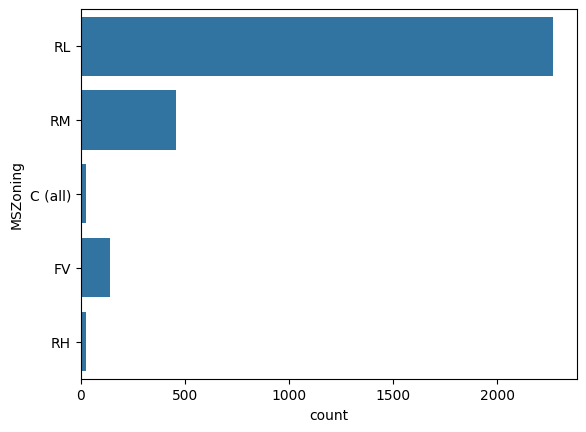

In [42]:
sns.countplot(df_mvi["MSZoning"])

<Axes: xlabel='count', ylabel='Alley'>

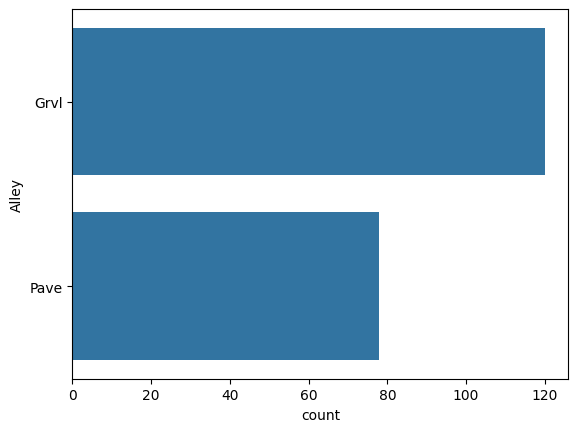

In [43]:
sns.countplot(df["Alley"])

In [44]:
alley_mode = df_mvi["Alley"].mode()[0]
df_mvi["Alley"].replace(np.nan, alley_mode, inplace=True)

<ipython-input-44-ae45cba37e34>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan, alley_mode, inplace=True)


<Axes: xlabel='count', ylabel='Alley'>

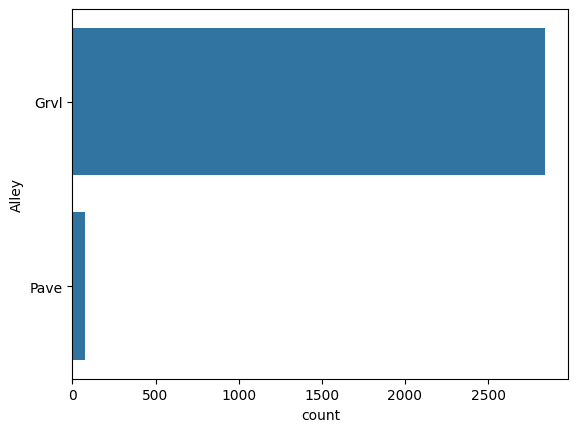

In [45]:
sns.countplot(df_mvi["Alley"])

In [46]:
df_mvi["Alley"].isnull().sum()

0

In [47]:
def boxHistogramPlot(df, figsize = (16, 5)):
  plt.figure(figsize = figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  sns.displot(df)


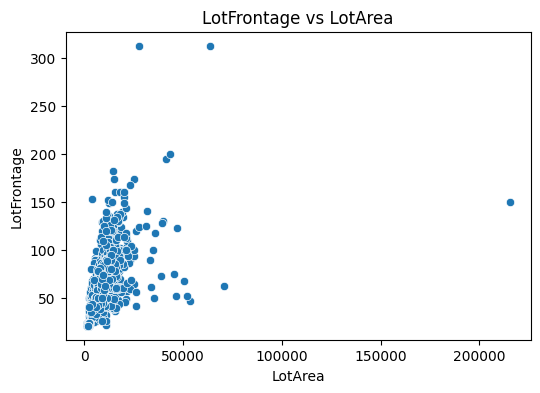

In [48]:
# Scatter plot for LotFrontage vs LotArea
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["LotArea"], y=df["LotFrontage"])
plt.title("LotFrontage vs LotArea")
plt.xlabel("LotArea")
plt.ylabel("LotFrontage")
plt.show()


In [49]:
lotfrontage_median = df["LotFrontage"].median()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_median, inplace=True)


<ipython-input-49-27634bb444e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotfrontage_median, inplace=True)


In [50]:
df_mvi["LotFrontage"].isnull().sum()

0

In [51]:
def oldNewBoxHistogramPlot(df, df_new, feature):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10)) # Create a 2x2 grid of subplots

    sns.boxplot(x=df[feature], ax=axes[0, 0]) # Assign boxplot to top-left subplot
    axes[0, 0].set_title("Old data distribution")

    sns.histplot(df[feature], ax=axes[0, 1])  # Assign histplot (was displot) to top-right subplot
    axes[0, 1].set_title("Old data distribution")

    sns.boxplot(x=df_new[feature], ax=axes[1, 0]) # Assign boxplot to bottom-left subplot
    axes[1, 0].set_title("New data distribution")

    sns.histplot(df_new[feature], ax=axes[1, 1])  # Assign histplot (was displot) to bottom-right subplot
    axes[1, 1].set_title("New data distribution")

    plt.tight_layout() # Adjusts subplot params for a tight layout
    plt.show() # Display the plot

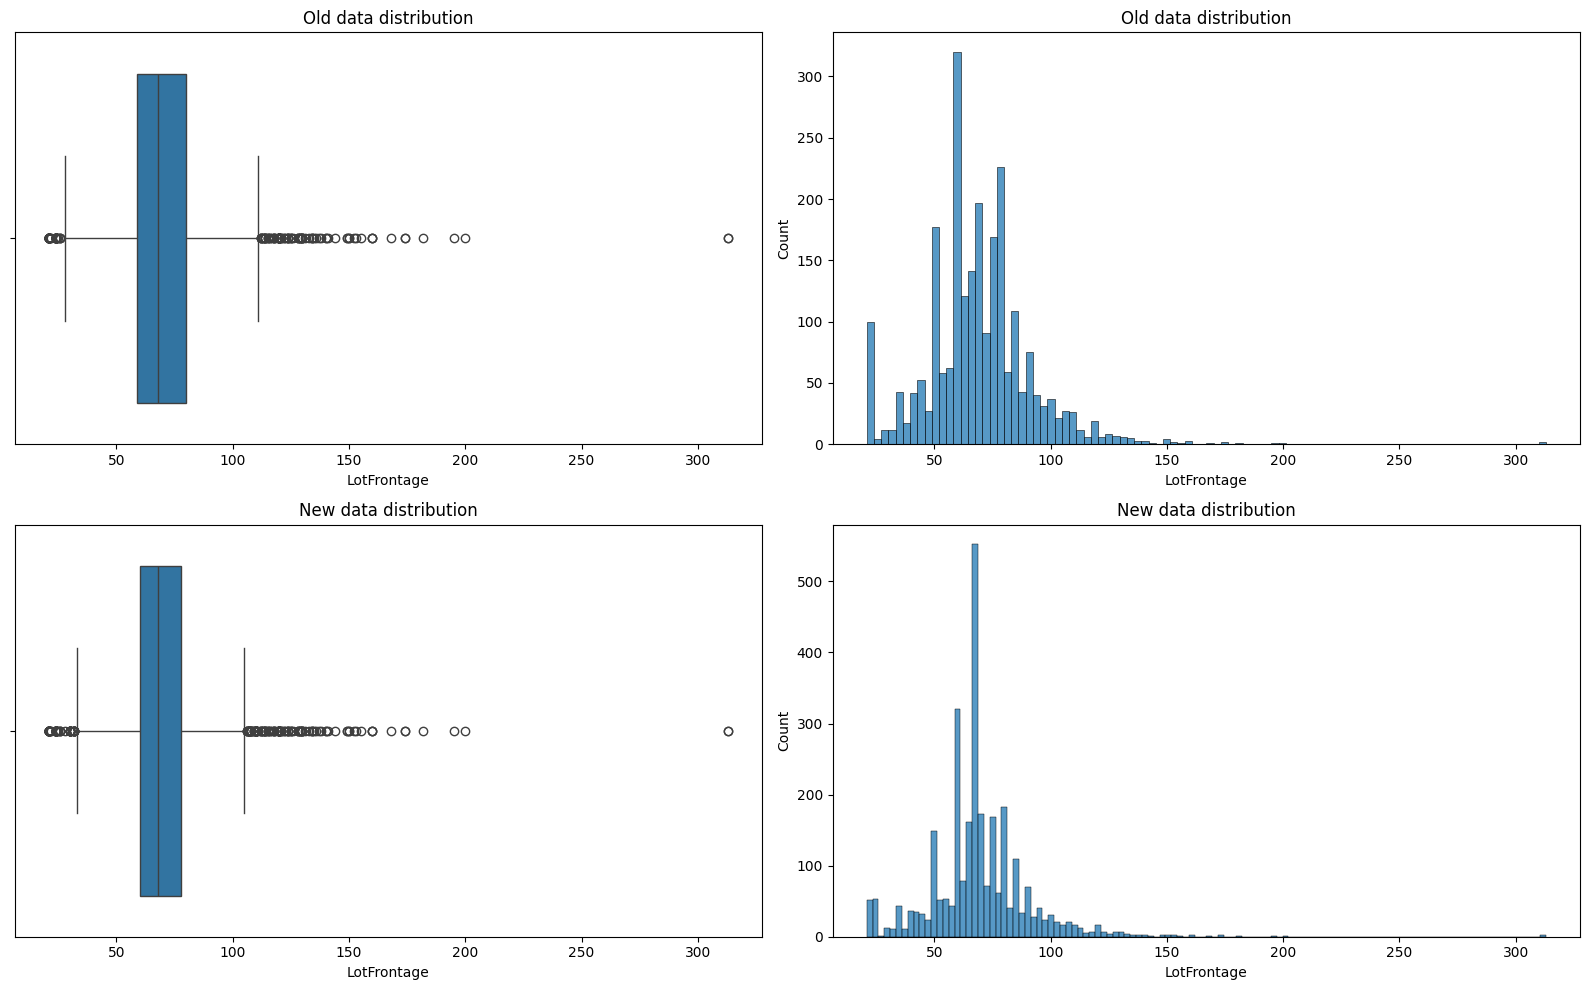

In [52]:
oldNewBoxHistogramPlot(df, df_mvi, "LotFrontage")

<Axes: xlabel='count', ylabel='Exterior1st'>

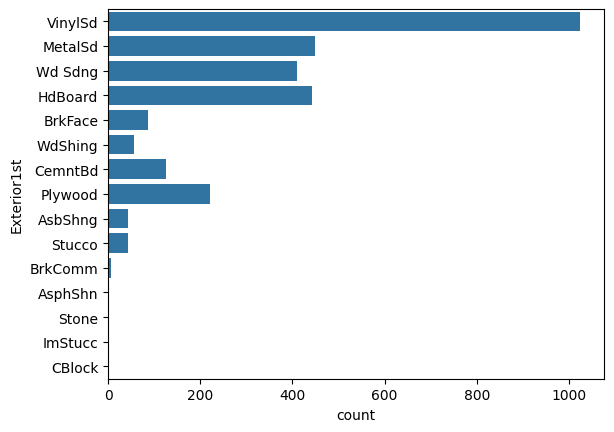

In [53]:
sns.countplot(df_mvi["Exterior1st"])

In [54]:
# Handling missing values of Exterior1st	0.034258  and Exterior2nd	0.034258

Exterior1st_mode = df_mvi["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode, inplace=True)

<ipython-input-54-086cea4205ca>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode, inplace=True)


In [55]:
df_mvi["Exterior1st"].isnull().sum()

0

<Axes: xlabel='count', ylabel='Exterior1st'>

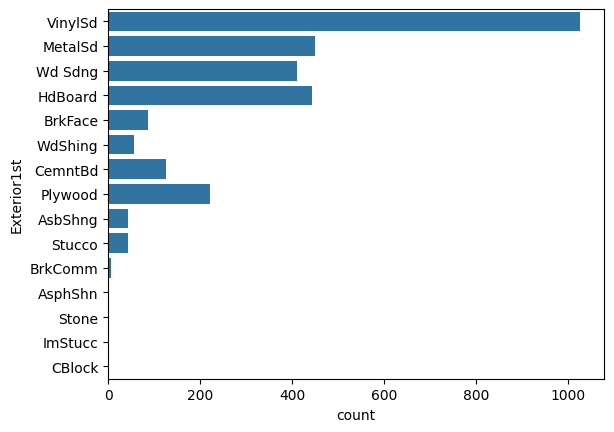

In [56]:
sns.countplot(df_mvi["Exterior1st"])

In [57]:
Exterior2nd_mode = df_mvi["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode, inplace=True)

<ipython-input-57-f5be37183360>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode, inplace=True)


In [58]:
df_mvi["Exterior2nd"].isnull().sum()

0

In [59]:
numeric_bsmt_feat =  ["BsmtFinSF1", "BsmtFinSF2",	"BsmtUnfSF", "BsmtFullBath",	"BsmtHalfBath","TotalBsmtSF"]

In [60]:
cat_bsmt_feat = ["BsmtQual",	"BsmtCond",	"BsmtExposure",	"BsmtFinType1","BsmtFinType2"]

In [61]:
for feature in cat_bsmt_feat:
  print(df[feature].value_counts())

BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [62]:
bsmt_const = "NA"
for feature in cat_bsmt_feat:
  df_mvi[feature].replace(np.nan, bsmt_const, inplace=True)

<ipython-input-62-db940f9209e0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, bsmt_const, inplace=True)


In [63]:
df_mvi[cat_bsmt_feat].isnull().sum()

,0
BsmtQual,0
BsmtCond,0
BsmtExposure,0
BsmtFinType1,0
BsmtFinType2,0


In [64]:
df_mvi.shape

(2919, 80)

In [65]:
df.shape

(2919, 80)

In [66]:
df_mvi[numeric_bsmt_feat].isnull().sum()

,0
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
BsmtFullBath,2
BsmtHalfBath,2
TotalBsmtSF,1


In [67]:
df_mvi["BsmtFinSF1"].head()

,BsmtFinSF1
Id,
1,706.0
2,978.0
3,486.0
4,216.0
5,655.0


In [68]:
bsmt_num = 0
for feature in numeric_bsmt_feat:
  df_mvi[feature].replace(np.nan, bsmt_num, inplace=True)

<ipython-input-68-6539e2f80d9a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, bsmt_num, inplace=True)


In [69]:
df_mvi[numeric_bsmt_feat].isnull().sum()

,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
BsmtFullBath,0
BsmtHalfBath,0
TotalBsmtSF,0


In [70]:
#Handling missing values of Utilities

df_mvi["Utilities"].value_counts()

,count
Utilities,
AllPub,2916
NoSeWa,1


<Axes: xlabel='count', ylabel='Utilities'>

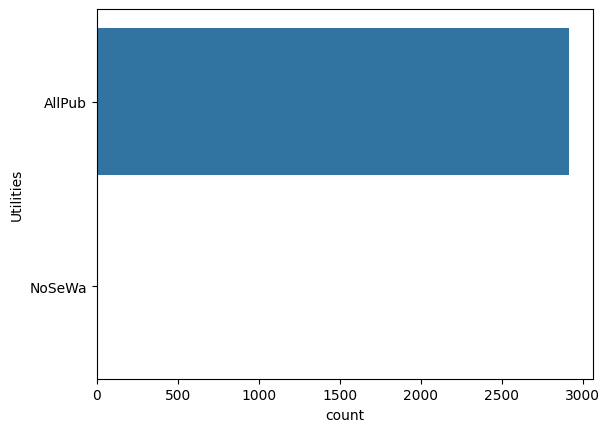

In [71]:
sns.countplot(df_mvi["Utilities"])

In [72]:
Utilities_mode = df_mvi["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, Utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

<ipython-input-72-b8fd62c18031>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, Utilities_mode, inplace=True)


0

<Axes: ylabel='Id'>

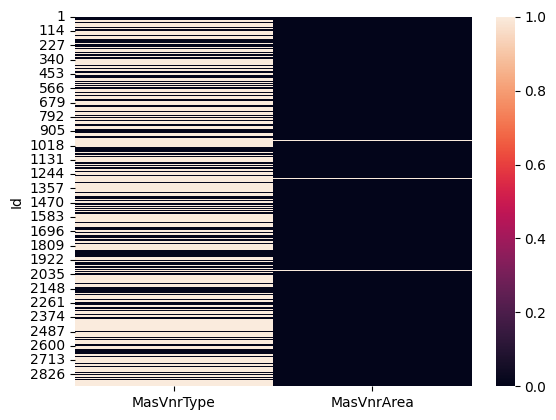

In [73]:
#Handling missing values of MasVnrType	60.500171(categorical) and MasVnrArea	0.787941(numerical)

#df_mvi["MasVnrType"].value_counts()
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

#according to this heatmap we ca identify all missing values of both MasVnrType and  MasVnrArea features

In [74]:
df["MasVnrType"].value_counts()

,count
MasVnrType,
BrkFace,879
Stone,249
BrkCmn,25


In [75]:
MasVnrType_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, MasVnrType_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

<ipython-input-75-88e88e5a0aed>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan, MasVnrType_mode, inplace=True)


0

In [76]:
MasVnrArea_mode = 0
df_mvi["MasVnrArea"].replace(np.nan, MasVnrArea_mode, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

<ipython-input-76-de0530d148ac>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan, MasVnrArea_mode, inplace=True)


0

In [77]:
#Electrical	0.034258 and KitchenQual	0.034258

Electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, Electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

<ipython-input-77-b7d85458bb48>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, Electrical_mode, inplace=True)


0

In [78]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

<ipython-input-78-745704f7b897>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)


0

In [79]:
#Functional	0.068517  Mode
#FireplaceQu	48.646797  NA
#PoolQC	99.657417 NA
# Fence	80.438506 NA
# MiscFeature	96.402878 NA
# SaleType	0.034258 Mode


Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, Functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

FireplaceQu_mode = "NA"
df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_mode, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

PoolQC_mode = "NA"
df_mvi["PoolQC"].replace(np.nan, PoolQC_mode, inplace=True)
df_mvi["PoolQC"].isnull().sum()

Fence_mode = "No fence"
df_mvi["Fence"].replace(np.nan, Fence_mode, inplace=True)
df_mvi["Fence"].isnull().sum()

MiscFeature_mode = "No feature"
df_mvi["MiscFeature"].replace(np.nan, MiscFeature_mode, inplace=True)
df_mvi["MiscFeature"].isnull().sum()


SaleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, SaleType_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

<ipython-input-79-a7bf0a27ff3d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan, Functional_mode, inplace=True)
<ipython-input-79-a7bf0a27ff3d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

0

In [80]:
df_mvi["Fence"].head()

,Fence
Id,
1,No fence
2,No fence
3,No fence
4,No fence
5,No fence


In [81]:
df_mvi["MiscFeature"].isnull().sum()

0

In [82]:
#categorical
# GarageType	5.378554 NA
# GarageFinish	5.447071 NA
# GarageQual	5.447071 NA
# GarageCond	5.447071 NA

cat_garage_feat = ["GarageFinish", "GarageQual", "GarageCond"]
for feature in cat_garage_feat:
  df_mvi[feature].replace(np.nan, "NA", inplace=True)

GarageType_mode = "No garage"
df_mvi["GarageType"].replace(np.nan, GarageType_mode, inplace=True)
df_mvi["GarageType"].isnull().sum()

<ipython-input-82-58e48f5ea9ff>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, "NA", inplace=True)
<ipython-input-82-58e48f5ea9ff>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

0

In [83]:
df_mvi["GarageType"].head()

,GarageType
Id,
1,Attchd
2,Attchd
3,Attchd
4,Detchd
5,Attchd


In [84]:
# GarageYrBlt	5.447071
# GarageCars	0.034258
# GarageArea	0.034258

num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]
for feature in num_garage_feat:
  df_mvi[feature].replace(np.nan, 0, inplace=True)

<ipython-input-84-e094dfd855f9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, 0, inplace=True)


In [85]:
df_mvi["GarageCars"].isnull().sum()

0

In [86]:
Alley_mode = "No alley access"
df_mvi["Alley"].replace(np.nan, Alley_mode, inplace=True)
df_mvi["Alley"].isnull().sum()

<ipython-input-86-9ce9936b7c13>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan, Alley_mode, inplace=True)


0

# Featuer Transfomation

**convert numerical features to categorical features**

In [87]:
#MSSubClass #reason = Numerical Values Do Not Represent Scale
#YearBuilt
#YearRemodAdd
#GarageYrBlt
#MoSold
#YrSold

feature_for_categorical = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]



In [88]:
print("Total numerical features convert for cat : ", len(feature_for_categorical))

Total numerical features convert for cat :  6


In [89]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [90]:
calendar.month_abbr[12]

'Dec'

In [91]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x: calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [92]:
for feature in feature_for_categorical:
  df_mvi[feature] = df_mvi[feature].astype(str)

In [93]:
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [94]:
for feature in feature_for_categorical:
  print(f"{feature} : data type = {df_mvi[feature].dtype}")

MSSubClass : data type = object
YearBuilt : data type = object
YearRemodAdd : data type = object
GarageYrBlt : data type = object
MoSold : data type = object
YrSold : data type = object


## Convert Categorical feature to numerical feature

### **Ordinal Encording**

In [95]:


ordinal_encording_var = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC","GarageFinish","Functional","Utilities","PavedDrive"]

print("Total ordinal categorical variable : ", len(ordinal_encording_var))



Total ordinal categorical variable :  17


In [96]:
df_mvi["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [97]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes

In [98]:
df_mvi["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [99]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av", "Gd"], ordered=True)).cat.codes

In [100]:
df_mvi["BsmtExposure"].unique()

array([1, 4, 2, 3, 0], dtype=int8)

In [101]:
df_mvi["BsmtExposure"].value_counts()

,count
BsmtExposure,
1,1904
3,418
4,276
2,239
0,82


In [102]:
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes
df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageQual"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd", "Ex"], ordered=True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], ordered=True)).cat.codes
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO", "NoSeWa", "NoSewr", "AllPub"], ordered=True)).cat.codes
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered=True)).cat.codes

In [103]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

## One Hot-Encoding Nominal categorical data to numerical

In [104]:
df_encod = df_mvi.copy()

In [105]:
df_encod["MSZoning"].value_counts()

,count
MSZoning,
RL,2269
RM,460
FV,139
RH,26
C (all),25


In [106]:
df_mvi["GarageCars"].isnull().sum()

0

In [107]:
df_encod["GarageCars"].isnull().sum()

0

In [108]:
object_feature = df_encod.select_dtypes(include=['object']).columns.tolist()

print("Total object features : ", len(object_feature))

print(object_feature)

Total object features :  32
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [109]:
df_encod.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,3,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706.0,1,0.0,150.0,856.0,GasA,4,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,3,8,7,0,0,Attchd,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,No fence,No feature,0,Feb,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,3,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,2,2,CBlock,4,3,4,5,978.0,1,0.0,284.0,1262.0,GasA,4,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,2,6,7,1,3,Attchd,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,No fence,No feature,0,May,2007,WD,Normal,181500.0


In [110]:
# Select the object feature columns
object_feature_df = df_encod[object_feature]

# Check for any NaN values in the object feature columns
any_nan_in_object_features = object_feature_df.isnull().values.any()

if any_nan_in_object_features:
    print("There are NaN values in the object feature columns.")
else:
    print("There are no NaN values in the object feature columns.")

# To get a count of NaN values in each object feature column:
nan_counts_per_object_feature = object_feature_df.isnull().sum()
print("\nNaN counts per object feature column:\n", nan_counts_per_object_feature)

# To get a summary of NaN values in object feature columns:
nan_info_object_features = object_feature_df.isnull().sum().sum()
print(f"\nTotal number of NaN values in object feature columns: {nan_info_object_features}")

# # If you want to find the rows with NaN values in object feature columns:
# rows_with_nan_object_features = df_encod[object_feature_df.isnull().any(axis=1)]
# print("\nRows with NaN values in object feature columns:\n", rows_with_nan_object_features)

There are no NaN values in the object feature columns.

NaN counts per object feature column:
 MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
Foundation       0
Heating          0
CentralAir       0
Electrical       0
GarageType       0
GarageYrBlt      0
Fence            0
MiscFeature      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

Total number of NaN values in object feature columns: 0


In [111]:
#df_encod = df_encod.drop('SalePrice', axis=1)

In [112]:
# # print("Shape of DF before encoding : ", df_encod.shape)
# # df_encod = pd.get_dummies(df_encod, columns=object_feature, prefix=object_feature, drop_first=True)
# # print("Shape of DF after encoding : ", df_encod.shape)

# # Get a list of all object (categorical) features
# object_features = df_encod.select_dtypes(include=['object']).columns

# # Apply one-hot encoding to all object features
# df_encod = pd.get_dummies(df_encod,
#                           columns=object_features,
#                           prefix=object_features,
#                           drop_first=True).astype(int)

# # Convert all columns to int64
# #df_encod = df_encod.astype(int)



In [113]:

from sklearn.preprocessing import OneHotEncoder

# Assuming df_encod is your DataFrame after ordinal encoding




# 2. Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# 3. Fit and transform the selected features
encoded_data = encoder.fit_transform(df_encod[object_feature])

# 4. Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data,
                           columns=encoder.get_feature_names_out(object_feature),
                           index=df_encod.index) # Use original index

# 5. Concatenate the encoded DataFrame with the original DataFrame
df_encod = pd.concat([df_encod, encoded_df], axis=1)

# 6. Drop the original integer features that were encoded
df_encod = df_encod.drop(columns=object_feature)

In [114]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,Yea

In [115]:
df_encod.shape

(2919, 543)

In [116]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 543 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(506), int64(20), int8(17)
memory usage: 11.8 MB


In [117]:
len_train = df_train.shape[0]
len_train

1460

In [118]:
# Split back into original train and test
df_encod = df_encod.iloc[:1460, :]  # First 1460 rows (original training data)
test_data = df_encod.iloc[1460:, :]   # Next 1459 rows (original test data)

In [119]:
df_encod["SalePrice"].head()

,SalePrice
Id,
1,208500.0
2,181500.0
3,223500.0
4,140000.0
5,250000.0


In [120]:
X = df_encod.drop('SalePrice', axis=1)
y = df_encod['SalePrice']

from sklearn.model_selection import train_test_split

# # Split the training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Adjust test_size and random_state as needed)



# # Print the shapes of the new sets
# print("X_train shape:", X_train.shape)
# print("v shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)



# Feature Scaling

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc  = StandardScaler()
sc.fit(X_train)

#z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [123]:
X_train[:3,:]

array([[ 0.00407658, -0.21289571,  0.02927282, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.48541733, -0.26524463,  0.02927282, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.12942176, -0.17784146,  0.02927282, ..., -0.12510865,
         0.46001984, -0.30263639]])

In [124]:
X_test[:3,:]

array([[ 0.00407658, -0.21159396,  0.02927282, ..., -0.12510865,
         0.46001984, -0.30263639],
       [ 1.25006107,  0.14564323,  0.02927282, ..., -0.12510865,
         0.46001984, -0.30263639],
       [-0.61891567, -0.16082574,  0.02927282, ..., -0.12510865,
         0.46001984, -0.30263639]])

In [125]:
!pip install xgboost

In [126]:
#!pip install scikit-learn==1.2.2

In [127]:
!pip install --upgrade scikit-learn xgboost

In [128]:
import sklearn
print(sklearn.__version__)

1.6.1


# Train ML Model

In [129]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression


In [130]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
rfr = RandomForestRegressor()
mlpr = MLPRegressor()
xgbr = XGBRegressor()
ir = IsotonicRegression()
gbr = GradientBoostingRegressor()

In [131]:
models = {"a":["LinearRegression",lr],
          "b":["SVR",svr],
          "c":["SGDRegressor",sgdr],
          "d":["KNeighborsRegressor",knr],
          "e":["GaussianProcessRegressor",gpr],
          "f":["DecisionTreeRegressor",dtr],
          "g":["GradientBoostingRegressor",gbr],
          "h":["RandomForestRegressor",rfr],
          "i":["XGBRegressor",xgbr],
          "j":["MLPRegressor",mlpr],
          "k":["IsotonicRegression",ir]
          }

# **This function evaluates a model’s performance using 7-fold cross-validation on the training data (X_train, y_train).**

In [132]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

### **Output: Returns the mean R² score across all folds**

In [133]:
models_score = []
for model in models:
  print("Training model : ", models[model][0])
  score = test_model(models[model][1], X_train, y_train)
  print("Score of Model : ", score)
  models_score.append([models[model][0], score[0]])

Training model :  LinearRegression
Score of Model :  [0.6439128776272359]
Training model :  SVR
Score of Model :  [-0.051615950158058234]
Training model :  SGDRegressor
Score of Model :  [-1380.5652787953309]
Training model :  KNeighborsRegressor
Score of Model :  [0.5718826418633421]
Training model :  GaussianProcessRegressor
Score of Model :  [-5.678548019683473]
Training model :  DecisionTreeRegressor
Score of Model :  [0.7136509452001943]
Training model :  GradientBoostingRegressor
Score of Model :  [0.85107036128882]
Training model :  RandomForestRegressor
Score of Model :  [0.8294769546703635]
Training model :  XGBRegressor


AttributeError: 'super' object has no attribute '__sklearn_tags__'

## ***I choose a best ML model for my project = GradientBoostingRegressor***

**Hyperparameter Tuning (Fine-Tuning)**

In [134]:
from sklearn.model_selection import GridSearchCV

# Example: Tune GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv=7, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [135]:
from sklearn.model_selection import cross_val_score


# Initialize your model (e.g., XGBoost with best parameters)
final_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=200)

# Cross-validation on training data (X_train, y_train)
cv_scores = cross_val_score(
    final_model,
    X_train,
    y_train,
    cv=5,  # Number of folds
    scoring='neg_mean_squared_error'  # Use 'r2' for R²
)

# Calculate RMSE
rmse_scores = np.sqrt(-cv_scores)
print(f"CV RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

CV RMSE: 29796.00 ± 5065.31


In [136]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [137]:
# Split training data into train and validation sets (80% train, 20% val)
X_train_val, X_val, y_train_val, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42
)

In [138]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the training set (for overfitting check)
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Manually compute RMSE

# Predict on the validation set (for generalization check)
y_val_pred = model.predict(X_val)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))  # Manually compute RMSE

print(f"Training R²: {train_r2:.4f}, Training RMSE: {train_rmse:.2f}")
print(f"Validation R²: {val_r2:.4f}, Validation RMSE: {val_rmse:.2f}")


Training R²: 0.9691, Training RMSE: 13569.94
Validation R²: 0.9689, Validation RMSE: 14171.26


In [139]:
model = GradientBoostingRegressor(
    max_depth=3,        # Depth of individual trees
    learning_rate=0.01,  # Learning rate for gradient boosting
    n_estimators=200,   # Number of trees in the ensemble
    subsample=0.6,      # Use 80% of data for each tree to add regularization
    min_samples_split=5,  # Minimum samples required to split an internal node
    min_samples_leaf=3   # Minimum samples required to be at a leaf node
)

model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_leaf=3,
                          min_samples_split=5, n_estimators=200, subsample=0.6)

In [140]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict on the training set (for overfitting check)
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Manually compute RMSE

# Predict on the validation set (for generalization check)
y_val_pred = model.predict(X_val)
val_r2 = r2_score(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))  # Manually compute RMSE

print(f"Training R²: {train_r2:.4f}, Training RMSE: {train_rmse:.2f}")
print(f"Validation R²: {val_r2:.4f}, Validation RMSE: {val_rmse:.2f}")


Training R²: 0.8576, Training RMSE: 29141.35
Validation R²: 0.8714, Validation RMSE: 28836.34


In [141]:

# Predict on the test set
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Manually calculate RMSE

print(f"Test R²: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.2f}")


Test R²: 0.8281
Test RMSE: 36307.29


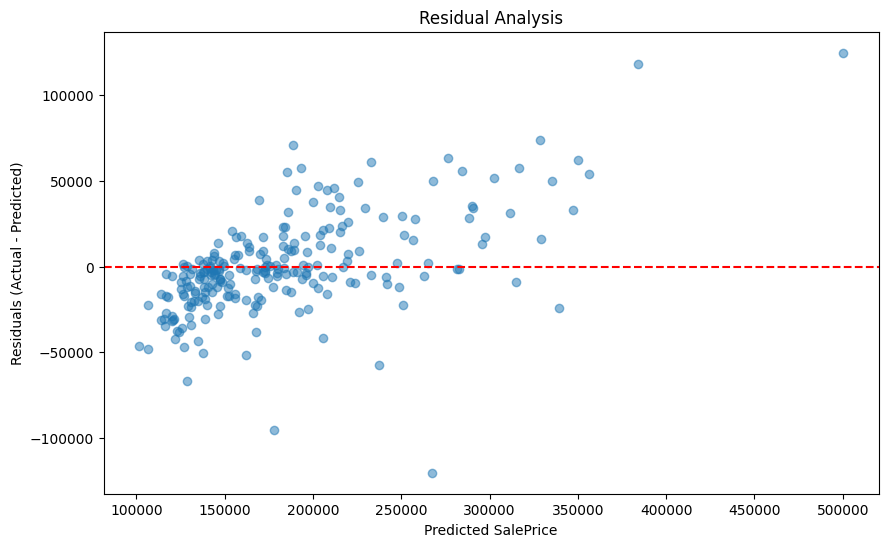

In [142]:
import matplotlib.pyplot as plt

# Calculate residuals (training or validation data)
residuals = y_val - y_val_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Analysis")
plt.show()

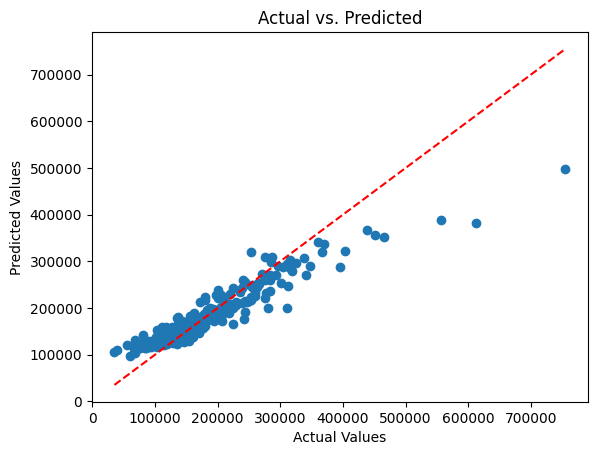

In [143]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


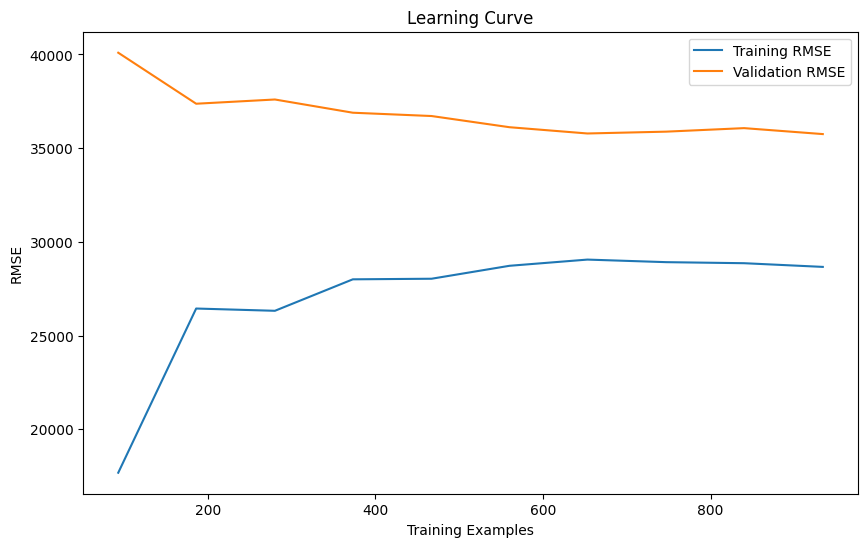

In [144]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and X_train, y_train are your training data

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)  # Adjust train_sizes as needed
)

# Convert scores to RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Training RMSE')
plt.plot(train_sizes, val_rmse, label='Validation RMSE')
plt.xlabel("Training Examples")
plt.ylabel("RMSE")
plt.title("Learning Curve")
plt.legend()
plt.show()

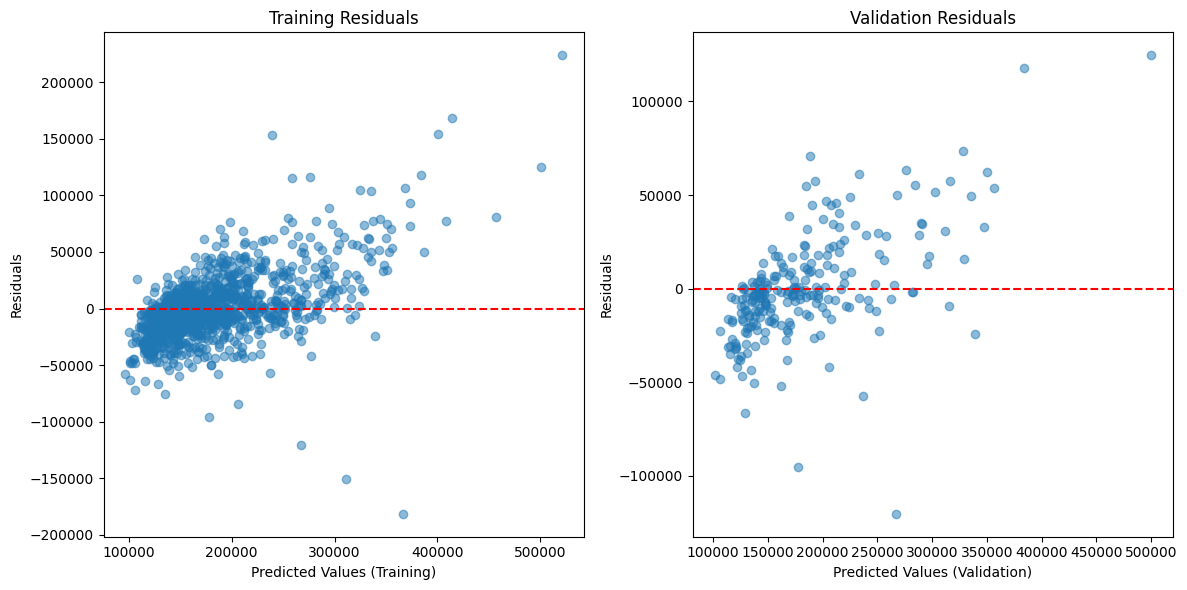

In [145]:
# Calculate residuals for training and validation sets
train_residuals = y_train - model.predict(X_train)
val_residuals = y_val - model.predict(X_val)

plt.figure(figsize=(12, 6))

# Training residuals
plt.subplot(1, 2, 1)
plt.scatter(model.predict(X_train), train_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Training)")
plt.ylabel("Residuals")
plt.title("Training Residuals")

# Validation residuals
plt.subplot(1, 2, 2)
plt.scatter(model.predict(X_val), val_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values (Validation)")
plt.ylabel("Residuals")
plt.title("Validation Residuals")

plt.tight_layout()
plt.show()

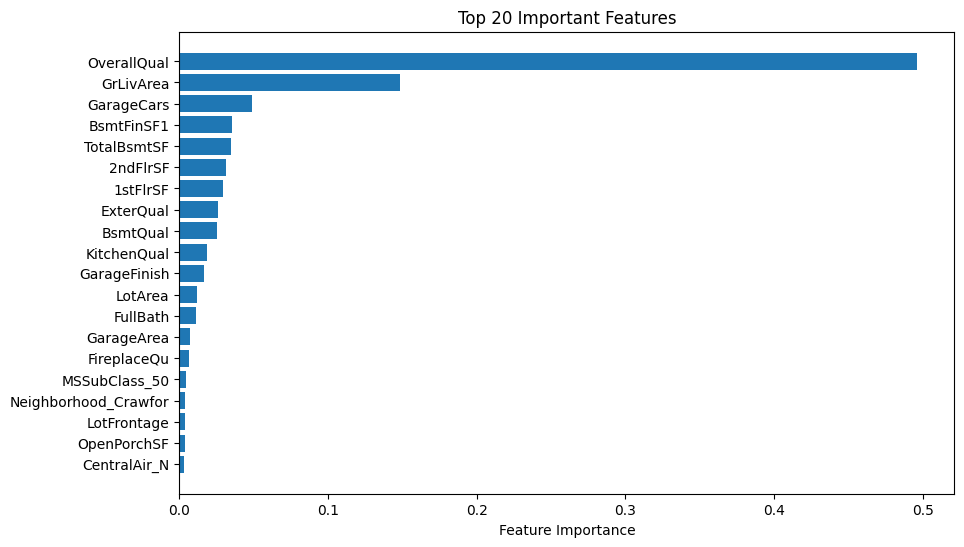

In [151]:
# Get feature importances
importances = model.feature_importances_
feature_names = df_encod.columns  # Ensure X_train is a DataFrame with column names

# Plot
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[-20:]  # Top 20 features
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.show()